
## Занятие 9. RNN, классификация текста



## План занятия

0. Повторение. Анализ текстовых данных.
1. Рекуррентная нейронная сеть.
2. Варианты RNN-ячеек: GRU, LSTM
3. Практика: построение рекуррентной нейронной сети для задачи классификации текста.

## 0. Повторение. Анализ текстовых данных.

На прошлом занятии мы начали разговор про обработку текста. Мы узнали, как можно создавать и даже выучивать информативные векторные представления частей текста (слов, частей слов).

Мы также обсудили способ, как на основе векторных представлений частей текстов можно создавать векторные представления всего текста. Этот способ — просуммировать или усреднить векторы всех слов текста, чтобы получить один вектор всего текста. Но у этого способа есть явные недостатки:
- Он не учитывает разную важность слов в тексте;
- Он не учитывает порядок слов в тексте.

Конечно, при работе с эмбеддингами можно обращать внимание на важность слов: например, не просто усреднять эмбеддинги всех слов в предложении, а брать взвешенное среднее с весами, пропорциональными важности слов. Однако и тут встает вопрос, как определить для каждого слова его важность. Хотелось бы, чтобы модель сама могла понимать это для каждого слова в предложении.
Ну и мы интуитивно понимаем, что смысл текста не равен среднему смыслов его слов. Это что-то сложнее.

Сейчас мы познакомимся с рекуррентными нейронными сетями (RNN, Recurrent Neural Networks), которые были придуманы для работы с данными, имеющими природу последовательности. Текст как раз имеет такую природу, поэтому RNN хорошо подходят для работы с текстами.


## 1. Рекуррентные нейронные сети.


### Устройство классической RNN

В чем состоит идея RNN:

Одно из главных отличий текста и звука от других типов данных (например, изображений) состоит в наличии временно́й компоненты. Мы читаем текст не моментально, а слово за словом, в строго определенном порядке. Возникает идея придумать идею нейросети, которая учитывала бы эту особенность этих типов данных. Нейросеть, которая могла бы обрабатывать текст, "читая" его слово за словом.


Чтобы построить RNN, вспомним, как работает обычная полносвязная нейросеть:

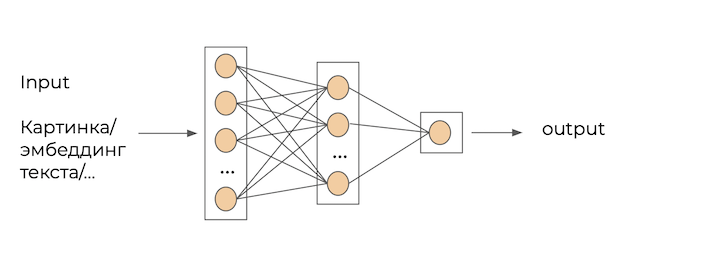



На вход нейросети подается объект, представленный в виде вектора. Этот объект проходит через слои сети и сеть выдает ответ. Когда нейросети подается на вход следующий объект, нейросеть выполняет с ним ***точно такие же преобразования***, что и с предыдущим поданным на вход объектом. Никакой информации от предыдущего объекта в нейросети не сохранилось.

Если мы хотим, чтобы нейросеть читала текст слово за словом, нужно как-то снабдить ее механизмом "памяти".

Рекуррентная нейросеть будет похожа на полносвязную. Но к каждому ее слою добавится еще одна связь — из себя в себя. Это будет "памятью" этого слоя.

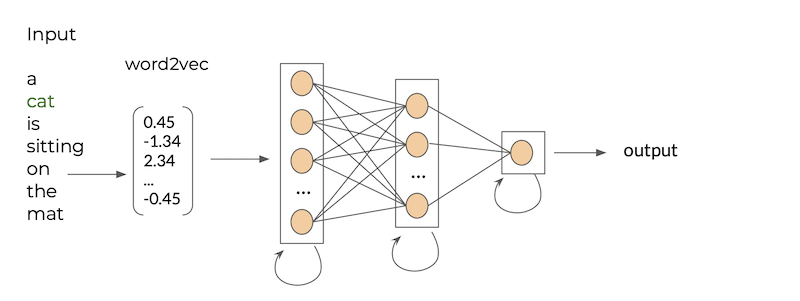

Сейчас мы детально разберем, как устроен слой такой сети и вся сеть. Изобразим обычный полносвязный слой:

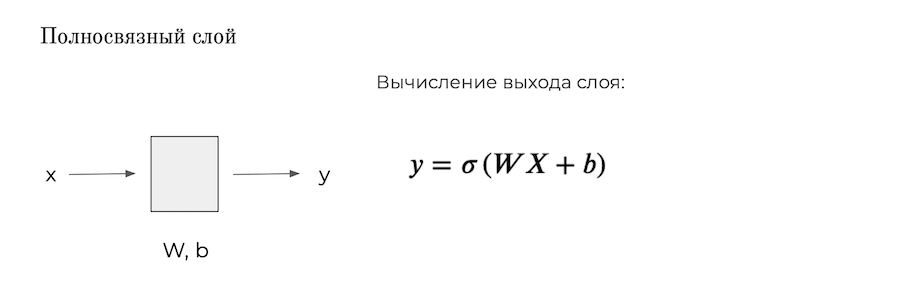

В нем было два обучаемых параметра ($W$ и $b$). В рекуррентном слое будет на три обучаемых параметра больше, и появится новая сущность — вектор скрытого состояния этого слоя. Это будет "памятью" слоя.

Теперь на основе входа $X^T$ будет сначала обновляться вектор скрытого состояния слоя $h^{t-1} -> h^t$, а затем выход слоя будет вычисляться на основе обновленного вектора $h^t$

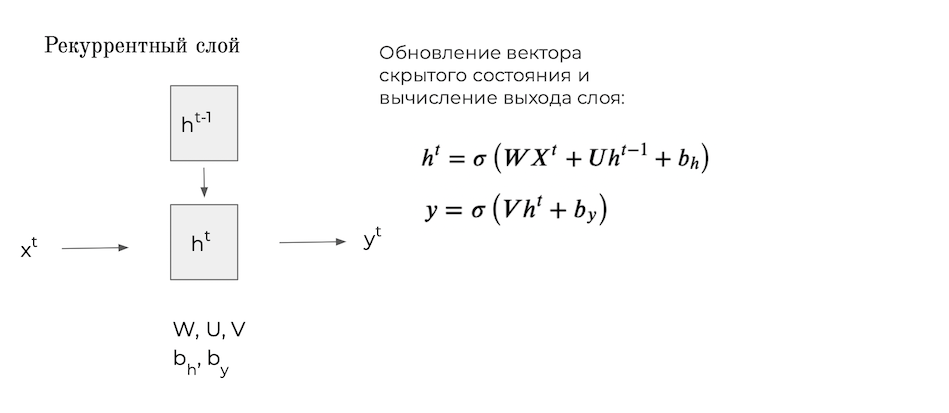

Для наглядности слой полносвязной и рекуррентной нейросети можно нарисовать по-другому:

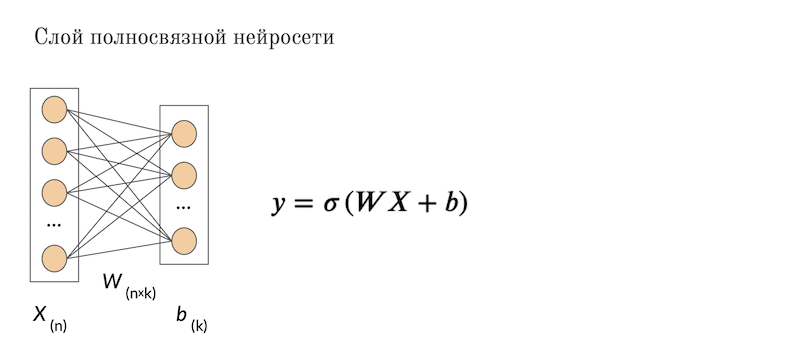

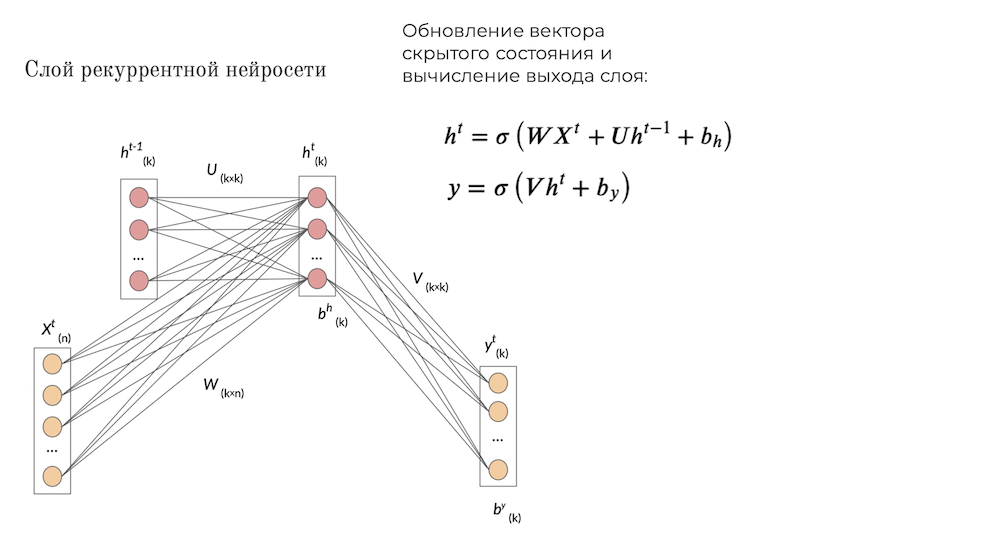

Так происходит forward pass одного рекуррентного слоя. Перейдем в [презентацию](https://docs.google.com/presentation/d/1q97eoaLwdkhlwXMxYYTn6LOgatG6PQ6h7NvkbQak3ig/edit?usp=sharing), чтобы разобрать forward pass рекуррентной нейронной сети с $n$ рекуррентными слоями.

Обучение рекуррентной нейросети происходит также с помощью градиентного спуска. Отличия появляются только в подсчете градиентов параметров. Подробнее об этом можно посмотреть в [лекции](https://rutube.ru/video/f4689f6a3407e0805262bb177aef1f10/?r=wd) Deep Learning School.

#### Функции активации в RNN

Еще раз посмотрим на формулу RNN-слоя, которая у нас получилась:

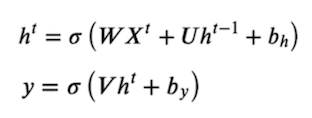

Посмотрим на функцию активации в формуле обновления вектора скрытого состояния, которую мы обозначили $\sigma$. В стандартной RNN, которую мы только что рассмотрели, и в различных ее модификациях (некоторые из которых мы рассмотрим далее) в качестве функции активации в формуле обновления вектора скрытого состояния чаще всего используется тангенциальная функция (tanh).

Дело в том, что в случае с RNN нам важны следующие вещи:
- чтобы элементы обновленных векторов скрытого состояния в каждый момент времени имели примерно одинаковый масштаб значений, и чтобы эти значения имели не очень большой модуль;
- чтобы производная функции активации была как не очень большой, так и не очень малой по модулю.  

Важно нам это потому, что при обучении RNN-сетей с помощью алгоритма обратного распространения ошибки часто возникают проблемы затухания и взрыва градиентов. И правильный выбор функции активации для вектора $h^t$ сильно помогает с этими проблемами бороться. Подробно о том, почему при обучении RNN могут возникнуть эти проблемы, можно узнать из [лекции Deep Learning School](https://rutube.ru/video/22f00ef2a4a5cbccd93038db267b8be5/?r=wd).

А мы заметим, что среди распространенных функций активации, таких как Sigmoid, Tanh и ReLu, характеристики Tanh лучше всего подходят для наших нужд:

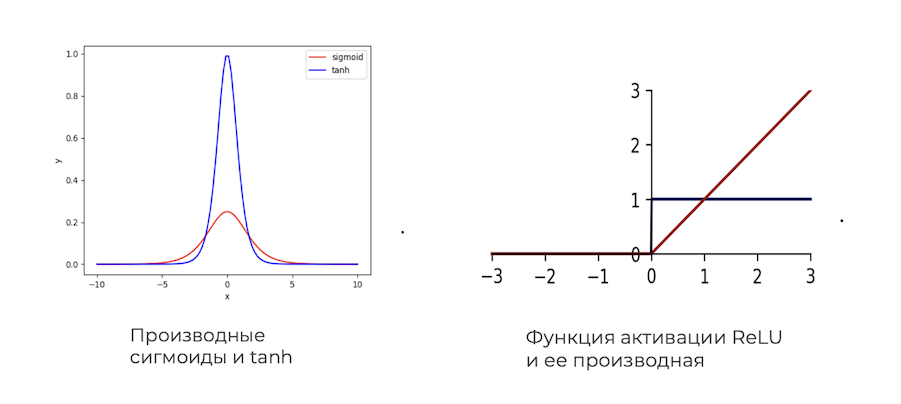

Слева вы видите графики производных функций Sigmoid и Tanh. Видно, что модуль производной сигмоиды довольно мал, сильно меньше единицы при любом значении аргумента. Из-за этого при использовании Sigmoid в качестве функции активации для вектора скрытого состояния $h^t$ легко возникает проблема затухания градиентов. Производная же Tanh, как видно, во многих точках около нуля по модулю сильно больше, чем производная Sigmoid, но при этом ее модуль не выходит за единицу.

Справа вы видите график функции активаци ReLu и ее производной. Функция ReLU не ограничена сверху, а ее производная во многих точках равна 1. Из-за того, что значение самой функции и ее производной могут принимать довольно большие по модулю значения, при использовании ReLu в качестве функции активации для вектора скрытого состояния $h^t$ легко возникает проблема взрыва градиентов.

Из-за этих эффектов для функции активации в формуле $h^t$ обычно выбирается Tanh.

### Слой Embedding

Остался один нюанс: в рекуррентных нейросетях эмбеддинги слов обычно берутся не из word2vec, а выучиваются. Для этого перед рекуррентными слоями добавляется слой эмббединга. Этот слой — матрица размера $n*k$, где $n$ — размер словаря, $k$ — размер эмбеддинга. Слова подаются на вход сети в виде их one-hot векторов. После пропускания через слой embedding one-hot вектор превращается в $i$-ю строку матрицы эмбеддинга, где $i$ — номер слова в словаре.

В итоге общее устройство RNN для задачи, например, классификации текста выглядит следующим образом:

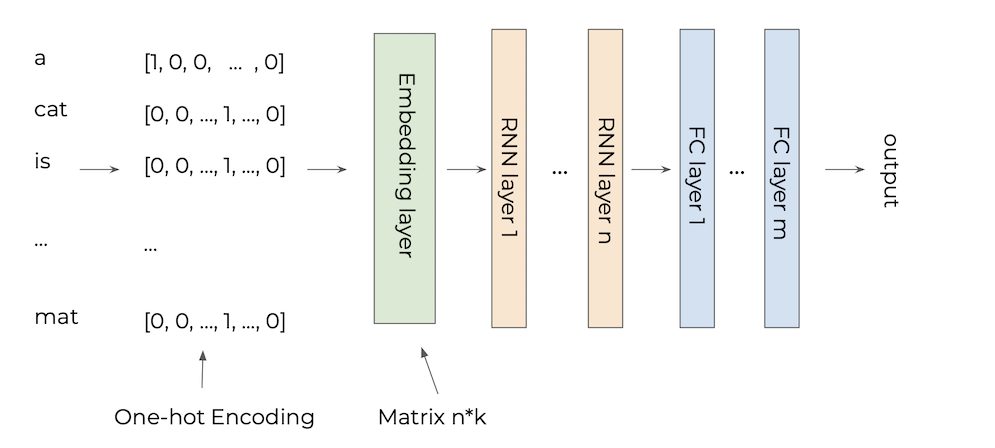

### LSTM, GRU

Несмотря на то, что в RNN в том виде, что мы разобрали выше, информация передается во времени от предыдущего скрытого состояния слоя к следующему, такое "классическое" устройство RNN страдает от серьезной проблемы — забывания. Когда в RNN подается на вход достаточно длинный текст, то к концу его обработки вектор скрытого состояния рекуррентных слоев содержит в основном информацию с последних моментов времени, т.е. с конца текста, а информация, накопленная на начальных моментах времени, затирается и практически исчезает. Говорят, что RNN "забывает" начало текста.

Это может, разумеется, сильно вредить качеству модели. Допустим, например, что мы решаем задачу классификации текста. В этом случае мы хотим, чтобы наша модель "прочитала" весь текст целиком, и потом выдала ответ, к какому классу принадлежит входящий текст. Если текст будет достаточно длинный, то к концу его обработки RNN-слои будут "помнить" только его конец, и выдавать ответ на задачу нейросеть будет только на основе конца исходного текста. Кажется, это не то, чего мы бы хотели.

Есть несколько идей, как бороться с этой проблемой. Одна из них — использовать немного модифицированные виды рекуррентных слоев — LSTM или GRU. Эта идея помогает в борьбе с проблемой, описанной выше, хотя полностью ее не решает. То есть, при использовании LSTM или GRU RNN начинает лучше работать на длинных текстах, но все еще страдает от проблемы забывания. Далее в курсе мы познакомимся с еще одной идеей, которая уже поможет основательно решить эту проблему.

#### LSTM

LSTM (Long Short-Term Memory) — это слой RNN с некоторыми модификациями, которые помогают ему лучше обрабатывать длинные последовательности. Сейчас мы разберем, как он устроен.

Для начала скажем вот что: часто в статьях/видео можно встретить иллюстрацию классического RNN-слоя в следующем виде:

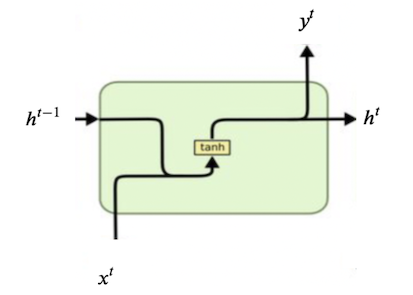

Здесь:
$$h^t = tanh(WX^t + Uh^{t-1} + b_h)$$
$$y^t = \sigma(W_yh^t + b_y)$$

Иногда при этом считают, что $y^t = h^t$, т.е. выход слоя в момент времени $t$ — это вектор его скрытого состояния в момент времени $t$. А дальше к этому выходу можно применить полносвязный слой, и тогда получится ровно та формула $y^t$, что написана выше.

По сравнению с обычным RNN-слоем слой LSTM можно представить в следующем виде:

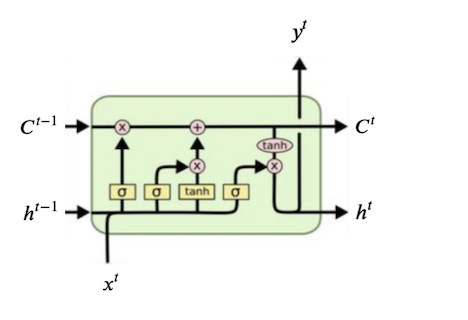

В LSTM уже два ветора скрытого состояния — $C^t$ и $h^t$. Они имеют одинаковый размер.

Формулы при этом будут такими:
- $f^t = \sigma(W_f \cdot [h^{t-1}, x^t] + b_f)$
- $i^t = \sigma(W_i \cdot [h^{t-1}, x^t] + b_i)$
- $C^t_{add} = tanh(W_C \cdot [h^{t-1}, x^t] + b_C)$
- $C^{t} = f^t * C^{t-1} + i^t * C^t_{add}$
- $o^t = \sigma(W_o \cdot [h^{t-1}, x^t] + b_o)$
- $h^t = o^t * tanh(C^t)$
- $y^t = \sigma(W_yh^t + b_y)$


Здесь $W_f, b_f, W_i, b_i, E_c, b_c, W_o, b_o, W_y, b_y$ — обучаемые параметры. Векторы $f^t, i^t, o^t, C^t_{add}, C^t$ имеют такй же размер, как и $h^t$ и $x^t$.

Здесь уже больше сущностей, чем было у обычного RNN слоя. У LSTM слоя уже два вектора скрытого состояния — $C^t$ и $h^t$. Они имеют смысл — вектор $C^t$ LSTM-слоя можно рассматривать как "долгосрочную память" слоя, а вектор $h^t$ — "краткосрочную память" слоя. Также у LSTM сильно больше обучаемых параметров.

На самом деле, каждая составляющая LSTM имеет смысл. Работа LSTM-слоя идейно состоит из трех стадий:
- "ворота забывания" ("forget gate"). На этом этапе из долгосрочной памяти (вектора $C^t$) удаляется ненужная информация;
- "ворота входа" ("input gate"). На этом этапе в долгосрочную память (вектор $C^t$) добавляется новая информация;
- обновление скрытого состояния $h^t$ и вычисления выхода слоя ("output gate"). На этом этапе часть информации из долгосрочной памяти (вектора $C^t$) переносится в краткосрочную память (вектор $h^t$), и вычисляется выход слоя.

Давайте подробно пройдемся по тому, как работает LSTM-слой.

#### 1. Forget Gate

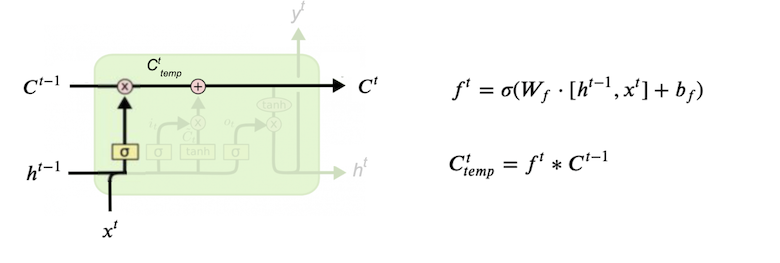

Идея Foget Gate — удалить из долгосрочной памяти $C^t$ информацию, которая к этому моменту стала не нужна.

Для этого на основе текущего состояния краткосрочной памяти $h^{t-1}$ и нового входа $x^t$ вычисляем вектор $f^t$. Этот вектор имеет тот же размер, что векторы $h^{t-1}$ и $x^t$. В формуле для $f^t$ $\sigma$ — это сигмоидная функция активации, поэтому $f^t$ — вектор со значениями от 0 до 1. Затем этот вектор поэлементно умножается на текущее состояние долгосрочной памяти $C^{t-1}$. Получается, что каждое значение вектора $C^{t-1}$ умножается на значение от 0 до 1, т.е. часть информации из каждого значения $C^{t-1}$ стирается. Это и есть "удаление" информации из $C^{t-1}$



#### 2. Input Gate

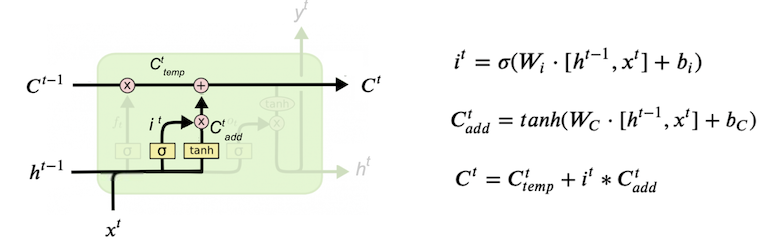

Идея input gate — добавить в долгосрочную память $C^t$ новую информацию.

Для этого мы на основе текущего состояния краткосрочной памяти $h^{t-1}$ и нового входа $x^t$ вычисляем вектор $C^t_{add}$ с информацией, которую мы хотим добавить в $C^t$. Для вычисления $C^t_{add}$ векторы $h^{t-1}$ и $x^t$ конкатенируются и подаются на вход полносвзяному слою.

Далее на основе текущего состояния краткосрочной памяти $h^{t-1}$ и нового входа $x^t$ еще вычисляется вектор $i^t$. В формуле для $i^t$ $\sigma$ — это сигмоидная функция активации, поэтому $i^t$ — вектор со значениями от 0 до 1. Этот вектор имеет тот же размер, что и $C^t_{add}$. Далее $i^t$ поэлементно умножается на $C^t_{add}$, т.е. каждое значение вектора $C^t_{add}$ умножается на значение от 0 до 1. Получается, что мы для каждой компоненты $C^t_{add}$ решаем, сколько информации из нее мы хотим добавить к вектору $C^t$.

Затем $C^t$ собирается как сумма $C^t_{temp}$, полученного на предыдущем шаге, и $i*t \cdot C^t_{add}$. Так к вектору долгосрочной памяти $C^t$ добавляется новая информация.

#### 3. Output Gate

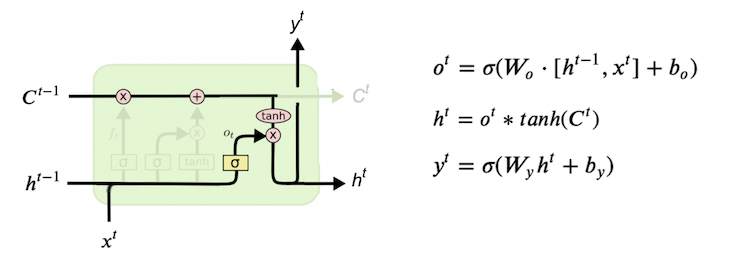

Идея Output Gate — обновить текущее состояние краткосрочной памяти $h^t$, и вычислить выход слоя на текущем шаге.

Сначала на основе текущего состояния краткосрочной памяти $h^{t-1}$ и нового входа $x^t$ еще вычисляется вектор $o^t$. В формуле для $o^t$ $\sigma$ — это сигмоидная функция активации, поэтому $o^t$ — вектор со значениями от 0 до 1. Этот вектор имеет тот же размер, что и $C^t$. Затем он поэлементно умножается на вектор $C^t$, который предварительно пропускается через тангенциальную функцию активации.

С помощью построения вектора $o^t$ решается, какую часть информации из $C^t$ нужно перенести на текущем шаге в краткосрочную память $h^t$. Затем выход слоя вычиляется, как обычно, на основе обновленного состояния $h^t$. Или, как мы сказали выше, часто считается, что выход слоя — $h^t$.

Более подробное описание LSTM можно найти в [данной презентации](https://docs.google.com/presentation/d/17JZrV15zEYA6SMldFiZu4s49ZJVeZrUA2PLAxQlOJp4/edit?usp=sharing).

## RNN для решения задачи классификации текста.

Мы будем решать задачу бинарной классификации отзывов на фильмы с IMDB.

Датасет состоит из пар (text, label), где text — текст отзыва на какой-либо фильм из базы imdb, label — значение 0 или 1. Класс 1 означает, что отзыв положительный, 0 — что отзыв отрицательный.

Для начала импортируем нужные библиотеки:

In [20]:
import os                                                                         # импортируем часть библиотеки для взаимодействия с данными на
                                                                                  # компьютере и для доступа к окружению, где запущен notebook
from random import sample                                                         # random - часть библиотеки, которая отвечает за случайные числа

import numpy as np                                                                # библиотека для работы с векторами и матрицами

import torch                                                                      # тут все нейронные сети
import torch.nn as nn                                                             # тут все блоки нейронных сетей, слои
import torch.nn.functional as F                                                   # функции, которые нам пригодятся

import matplotlib.pyplot as plt                                                   # для построения графиков
from IPython.display import clear_output                                          # для интерактивного построения графиков
                                                                                  # clear_output позволяет покадрово рисовать график сходимости
from tqdm import tqdm_notebook

from torch.utils.data import Dataset, DataLoader

In [21]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

### Скачивание и предобработка данных

Установим библиотеку datasets. В ней находятся многие датасеты, и один из них — "imdb", который мы будем использовать.  

In [3]:
! pip install datasets

In [4]:
! pip install nltk

Импортируем библиотеку и загружаем датасет:

In [22]:
import datasets

In [6]:
dataset = datasets.load_dataset('imdb')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Посмотрим, какие разделы есть в датасете и сколько в нем элементов:

In [23]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

Выведем пример текста и его лейбла:

In [24]:
dataset['train'][0]['text'], dataset['train'][0]['label']

('I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far between, e

Как видно, тексты в датасете не предобработаны. Давайте предобработаем их: приведем все к нижнему регистру, удалим знаки препинания и разделим текст на токены.

In [25]:
# библиотека для работы со строками. С ее помощью мы удалим знаки препинания
import string
# счетчик для создания счетчика слов
from collections import Counter
# библиотека, с помощью которой разобьем текст на токены
import nltk
from nltk.tokenize import word_tokenize

# скачиваем нужный пакет данных для работы библиотеки nltk
#nltk.download('punkt')
nltk.download('punkt_tab')

# функция для обработки предложения
def process_and_tokenize_text(text):
    # приводим к нижнему регистру и убираем пунктуацию
    prccessed_text = text.lower().translate(
        str.maketrans('', '', string.punctuation)
    )
    # токенизируем текст
    tokens = word_tokenize(prccessed_text)
    return tokens

# массивы для хранения токенизированных тренировочных и тестовых данных
train_data = []
test_data = []

# пустой счетчик слов
words = Counter()

# проходимся по текстам обучающего датасета и предобрабатываем их
for example in tqdm_notebook(dataset['train']):
    text = example['text']
    label = example['label']
    text_processed = process_and_tokenize_text(text)
    train_data.append((text_processed, label))

    # увеличиваем счетчик каждого слова в словаре
    for word in text_processed:
        words[word] += 1

# проходимся по текстам тестового датасета и предобрабатываем их
for example in tqdm_notebook(dataset['test']):
    text = example['text']
    label = example['label']
    text_processed = process_and_tokenize_text(text)
    test_data.append((text_processed, label))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
/tmp/ipython-input-246965548.py:31: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for example in tqdm_notebook(dataset['train']):


  0%|          | 0/25000 [00:00<?, ?it/s]

/tmp/ipython-input-246965548.py:42: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for example in tqdm_notebook(dataset['test']):


  0%|          | 0/25000 [00:00<?, ?it/s]

In [26]:
# создаем словарь как множество слов
vocab = set(['<unk>', '<bos>', '<eos>', '<pad>'])
# будем добавлять в словарь только те слова, которые
# встречались в обучающих данных не менее 25 раз
counter_threshold = 25

# пополняем словарь словами из words
for char, cnt in words.items():
    if cnt > counter_threshold:
        vocab.add(char)

Посмотрим, какого размера словарь у нас получился:

In [27]:
len(vocab)

11399

Создадим словари — соответствия между словами словаря и их порядковыми номерами.

In [28]:
word2ind = {token: i for i, token in enumerate(vocab)}
ind2word = {i: token for token, i in word2ind.items()}

В случае с текстами элементы данных могут иметь разную длину. Посмотрим на распределение длин текстов обучающего датасета в токенах:

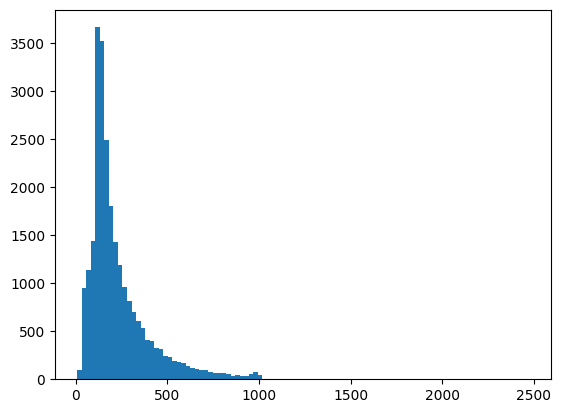

In [29]:
plt.hist([len(x[0]) for x in train_data], bins=100);

При формировании батчей для обучения сети нужно, чтобы все элементы батча имели один и тот же размер, т.е. одну и ту же длину. Чтобы это обеспечить, делают следующее:
- фиксируют максимальную длину элементов батча max_len;
- вычисляют реальную максимальную длину элементов батча max_seq_len;
- выбирают длину всех элементов текущего батча как max_len = min(max_len, max_seq_len);
- все элементы батча, которые длиннее max_len, обрезаются до max_len;
- все элементы батча, которые короче max_len, дополняются до max_len специальными **техническими токенами** \<pad\>.

Напишем функцию collate, которая принимает на вход батч данных и преобразовывает их для подачи на вход сети. Эту функцию будет использовать dataloader при формировании батчей. Эта функция будет проделывать действия, описанные выше.

In [30]:
def collate_fn_with_padding(input_batch, max_len=256):
    # input_batch — батч пар (токенизированный текст, label)
    texts = [x[0] for x in input_batch]
    labels = [x[1] for x in input_batch]
    # для каждого элемента батча получаем длину токенизированного текста в токенах
    seq_lens = [len(x) for x in texts]
    # определяем максимальную длину элементов в текущем батче
    max_seq_len = min(max(seq_lens), max_len)

    # проходимся по элементам батча и заменяем токены на их индексы из словаря
    # также последовательности короче max_seq_len дополняем токенами <pad>
    processed_texts = []
    for text, label in zip(texts, labels):
        text = text[:max_seq_len]
        text = [word2ind[x] if x in vocab else word2ind['<unk>'] for x in text]
        for _ in range(max_seq_len - len(text)):
            text.append(word2ind['<pad>'])

        processed_texts.append(text)

    # переводим элементы батча в форматы тензоров
    processed_texts = torch.LongTensor(processed_texts).to(device)
    labels = torch.LongTensor(labels).to(device)

    # собираем батч
    processed_batch = {
        'input_ids': processed_texts,
        'label': labels
    }

    return processed_batch

Поделим тестовые данные test_data на валидационные и тестовые, и заведем даталоадеры для всех частей данных.

In [31]:
# поделим тестовые данные на val и test
np.random.seed(42)
val_indices = np.random.choice(np.arange(len(test_data)), 10000)
test_indices = [x for x in range(len(test_data)) if x not in val_indices]
val_data = [test_data[i] for i in val_indices]
test_data = [test_data[i] for i in test_indices]

# заводим даталоадеры
batch_size = 128
train_dataloader = DataLoader(
    train_data, shuffle=True, collate_fn=collate_fn_with_padding, batch_size=batch_size)

val_dataloader = DataLoader(
    val_data, shuffle=False, collate_fn=collate_fn_with_padding, batch_size=batch_size)

test_dataloader = DataLoader(
    test_data, shuffle=False, collate_fn=collate_fn_with_padding, batch_size=batch_size)

### Построение сети

Построим RNN-сеть для решения нашей задачи классификации текстов. Она будет состоять из слоев эмбеддинга, рекуррентных и полносвязных слоев.

In [16]:
class SimpleRNN(nn.Module):
    def __init__(
        self, hidden_dim, vocab_size, num_classes,
        aggregation_type: str = 'last'
        ):
        super().__init__()
        # слой эмбеддинга
        self.embedding = nn.Embedding(vocab_size, hidden_dim)
        # рекуррентный слой
        # Параметры - размер эмбеддингов токенов, размер вектора скрытого состояния, формат представления данных в батче
        self.rnn = nn.RNN(hidden_dim, hidden_dim, batch_first=True)
        # два полносвязных слоя
        self.fc1 = nn.Linear(hidden_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, num_classes)

        # слой дропаут
        self.dropout = nn.Dropout(p=0.1)

        # каким образом выходы RNN-слоя для разных моментов времени будут
        # агрегироваться перед подачей дальше на вход полносвязному слою
        self.aggregation_type = aggregation_type

    def forward(self, input_batch) -> torch.Tensor:
        embeddings = self.embedding(input_batch)  # [batch_size, seq_len, hidden_dim]
        output, _ = self.rnn(embeddings)          # [batch_size, seq_len, hidden_dim]

        if self.aggregation_type == 'max':
            output = output.max(dim=1)[0]         #[batch_size, hidden_dim]
        elif self.aggregation_type == 'mean':
            output = output.mean(dim=1)           #[batch_size, hidden_dim]
        elif self.aggregation_type == 'last':
            output = output[:, -1, :]
        else:
            raise ValueError("Invalid aggregation_type")

        output = F.tanh(output)
        output = F.tanh(self.dropout(self.fc1(output)))   # [batch_size, hidden_dim]
        output = self.fc2(output)                         # [batch_size, num_classes]

        return output

Напишем также функции для обучения и тестирования модели:

In [32]:
def evaluate(model, dataloader):
    """
    Calculate accuracy on data from dataloader.
    """

    predictions = []
    target = []
    with torch.no_grad():
        for batch in tqdm_notebook(dataloader,
                                   desc=f'Evaluating'):
            logits = model(batch['input_ids'])
            predictions.append(logits.argmax(dim=1))
            target.append(batch['label'])

    predictions = torch.cat(predictions)
    target = torch.cat(target)
    accuracy = (predictions == target).float().mean().item()

    return accuracy

In [33]:
def train(model, optimizer, criterion, num_epoch=5, eval_steps=100):

    losses = []
    accs_train = []
    accs_val = []

    for epoch in range(num_epoch):
        epoch_losses = []
        model.train()
        for i, batch in enumerate(tqdm_notebook(train_dataloader,
                                                desc=f'Training epoch {epoch}:')):
            optimizer.zero_grad()
            logits = model(batch['input_ids'])
            loss = criterion(logits, batch['label'])
            loss.backward()
            optimizer.step()

            epoch_losses.append(loss.item())
            if i % eval_steps == 0:
                model.eval()
                accs_train.append(evaluate(model, train_dataloader))
                accs_val.append(evaluate(model, val_dataloader))
                model.train()

        losses.append(sum(epoch_losses) / len(epoch_losses))

    return losses, accs_train, accs_val

Запустим обучение сети с разными типа агрегации на 10 эпох:

In [34]:
num_epoch = 10
eval_steps = len(train_dataloader) // 2


losses_type = {}
accs_train_type = {}
accs_val_type = {}

for aggregation_type in ['max', 'mean', 'last']:
    print(f"Starting training for {aggregation_type}")
    losses = []
    acc = []

    model = SimpleRNN(hidden_dim=256,
                      vocab_size=len(vocab),
                      num_classes=2,
                      aggregation_type=aggregation_type
                      ).to(device)
    criterion = nn.CrossEntropyLoss(ignore_index=word2ind['<pad>'])
    optimizer = torch.optim.Adam(model.parameters())

    losses, accs_train, accs_val = train(model,
                                         optimizer,
                                         criterion,
                                         num_epoch=5,
                                         eval_steps=len(train_dataloader) // 2)

    losses_type[aggregation_type] = losses
    accs_train_type[aggregation_type] = accs_train
    accs_val_type[aggregation_type] = accs_val

Starting training for max


/tmp/ipython-input-3885647235.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i, batch in enumerate(tqdm_notebook(train_dataloader,


Training epoch 0::   0%|          | 0/196 [00:00<?, ?it/s]

/tmp/ipython-input-4154025148.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch in tqdm_notebook(dataloader,


Evaluating:   0%|          | 0/196 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/196 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 1::   0%|          | 0/196 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/196 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/196 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 2::   0%|          | 0/196 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/196 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/196 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 3::   0%|          | 0/196 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/196 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/196 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 4::   0%|          | 0/196 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/196 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/196 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Starting training for mean


Training epoch 0::   0%|          | 0/196 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/196 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/196 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 1::   0%|          | 0/196 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/196 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/196 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 2::   0%|          | 0/196 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/196 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/196 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 3::   0%|          | 0/196 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/196 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/196 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 4::   0%|          | 0/196 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/196 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/196 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Starting training for last


Training epoch 0::   0%|          | 0/196 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/196 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/196 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 1::   0%|          | 0/196 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/196 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/196 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 2::   0%|          | 0/196 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/196 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/196 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 3::   0%|          | 0/196 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/196 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/196 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 4::   0%|          | 0/196 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/196 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/196 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]

Визуализируем изменения значений лосс-функции на тренировочном датасете, и accuracy на тренировочном и валидационном датасете в процессе обучения для всех трех типов агрегации:

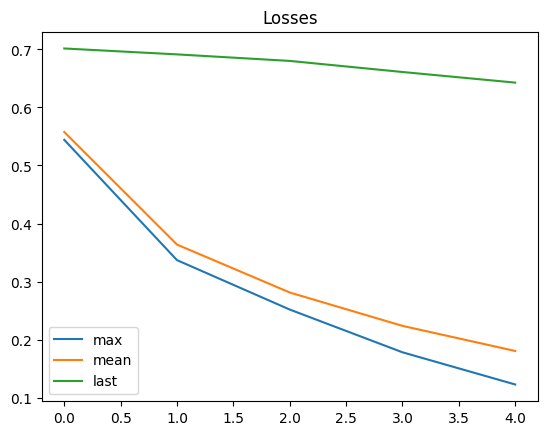

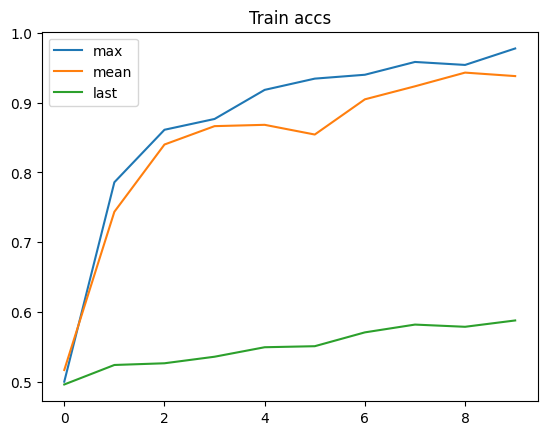

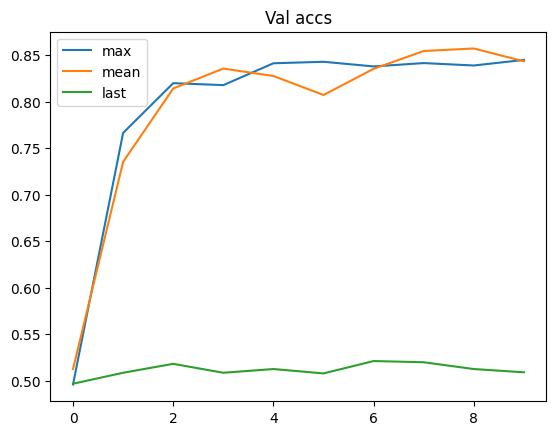

In [35]:
for aggregation_type in ['max', 'mean', 'last']:
    plt.plot(losses_type[aggregation_type])
plt.title('Losses')
plt.legend(['max', 'mean', 'last'])
plt.show()

for aggregation_type in ['max', 'mean', 'last']:
    plt.plot(accs_train_type[aggregation_type])
plt.title('Train accs')
plt.legend(['max', 'mean', 'last'])
plt.show()

for aggregation_type in ['max', 'mean', 'last']:
    plt.plot(accs_val_type[aggregation_type])
plt.title('Val accs')
plt.legend(['max', 'mean', 'last'])
plt.show()

Подумайте, почему для типа "last" получились такие плохие результаты?

## Дополнительные материалы

- Лекции Deep Learning School по RNN:
    - [Рекуррентная нейронная сеть](https://rutube.ru/video/718c4fe80491545bd2cf9551d51d9055/?r=wd);
    - [Обучение RNN](https://rutube.ru/video/f4689f6a3407e0805262bb177aef1f10/?r=wd);
    - [Функции активации RNN](https://rutube.ru/video/22f00ef2a4a5cbccd93038db267b8be5/?r=wd);
    - [Семинар по RNN](https://youtu.be/_wpAkWZmlyg?feature=shared).
